In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [4]:
df=pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.shape

(14999, 10)

In [9]:
left=df[df.left==1]
left.shape              #3.6k approx employees left

(3571, 10)

In [10]:
retained=df[df.left==0]
retained.shape          #11.5k approx employees retained

(11428, 10)

In [11]:
#Average values for columns
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [ ]:
#Satisfaction Level: people who left had lower satisfaction level (0.44) than people who are employed(0.66)
#Avg monthly hours: higher in employees leaving the firm(199 vs 207)
#Promotion in last 5 years: employees who are given promotion are likely to be retained

<AxesSubplot:xlabel='salary'>

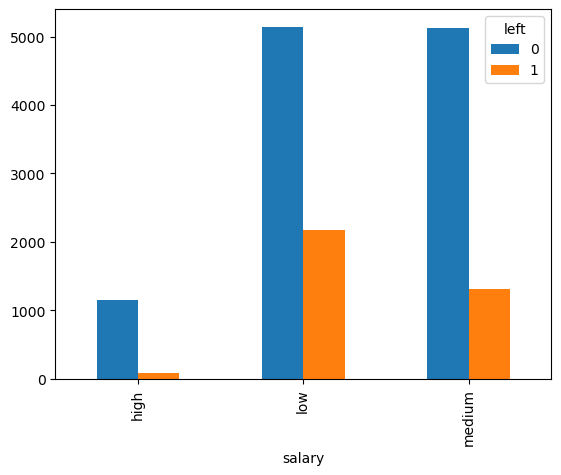

In [14]:
pd.crosstab(df.salary,df.left).plot(kind='bar')
#Employees with higher salary are less likely to leave 

<AxesSubplot:xlabel='Department'>

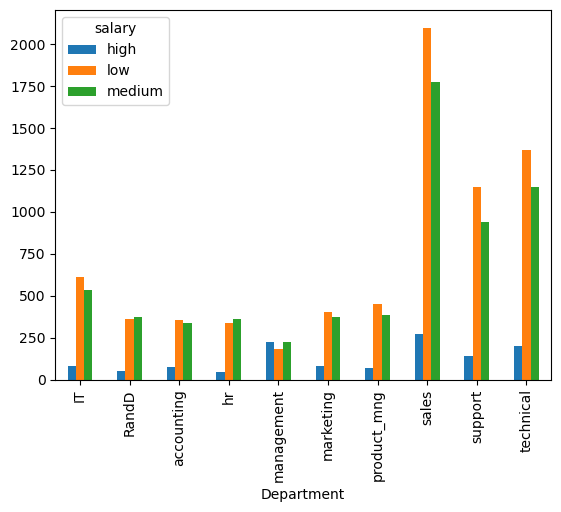

In [15]:
pd.crosstab(df.Department,df.salary).plot(kind='bar')

In [16]:
#from our above data exploration we will use the following as our INDEPENDENT VARIABLES:
#Satisfaction level, Avg monthly hours, promotion in last 5 years, salary


In [18]:
new_df=df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
new_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [19]:
dummies=pd.get_dummies(new_df.salary,prefix="salary")

In [20]:
merged_df=pd.concat([new_df,dummies],axis='columns')
merged_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [21]:
X=merged_df.drop(['salary'],axis='columns')
y=df.left

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [23]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [25]:
model.score(X_test,y_test)

0.7675555555555555

In [26]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
# Assuming X has only two features for simplicity
if X_train.shape[1] == 2:
    # Plot training and testing points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k', marker='o', label='Training Points')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired, edgecolors='k', marker='x', label='Testing Points')

    # Create a meshgrid for decision boundary plotting
    xx, yy = np.meshgrid(np.arange(X_train[:, 0].min() - 1, X_train[:, 0].max() + 1, 0.02),
                         np.arange(X_train[:, 1].min() - 1, X_train[:, 1].max() + 1, 0.02))

    # Predict labels for each point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plot decision boundary
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red', label='Decision Boundary')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Logistic Regression Decision Boundary')
    plt.legend()
    plt.show()
else:
    print("Visualization is supported only for datasets with two features.")


Visualization is supported only for datasets with two features.
